In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

C:\Users\hm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [144]:
seq_length = 7
data_dim = 5
hidden_dim = 64
output_dim = 1
learning_rate = 0.01
iterations = 1100
layer_size = 2

In [145]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [146]:
x = np.loadtxt('E:\\amazone/x0916.csv', delimiter=',')
y = np.loadtxt('E:\\amazone/y16.csv', delimiter=',')
x_norm = MinMaxScaler(x).reshape([-1,seq_length, data_dim])
y_norm = MinMaxScaler(y).reshape([-1,output_dim])
print("X Shape: ", x_norm.shape)
print("Y Shape: ", y_norm.shape)

X Shape:  (423, 7, 5)
Y Shape:  (423, 1)


In [147]:
x_train = x_norm[:323,:,:]
y_train = y_norm[:323,:]
x_test = x_norm[323:,:,:]
y_test = y_norm[323:,:]
print("train X Y Shape", x_train.shape, y_train.shape)
print("test X Y Shape", x_test.shape, y_test.shape)

train X Y Shape (323, 7, 5) (323, 1)
test X Y Shape (100, 7, 5) (100, 1)


In [148]:
tmp = MinMaxScaler(x)
tmp[:,1]

array([0.02250192, 0.01971394, 0.0196591 , ..., 0.01584943, 0.0123388 ,
       0.01526602])

In [149]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [150]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
# cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.nn.softsign)
#multi_cells = tf.contrib.rnn.MultiRNNCell([cell]*layer_size, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)

In [24]:
cells = []
for _ in range(layer_size):
        cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True,  activation=tf.nn.softsign)
        cells.append(cell)
        cell = tf.contrib.rnn.MultiRNNCell(cells)

In [151]:
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)

In [152]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [153]:
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step: 0] loss: 34.13737869262695
[step: 1] loss: 4.308407783508301
[step: 2] loss: 20.377798080444336
[step: 3] loss: 5.450251579284668
[step: 4] loss: 5.752725601196289
[step: 5] loss: 9.638290405273438
[step: 6] loss: 9.614030838012695
[step: 7] loss: 7.189314365386963
[step: 8] loss: 4.666496276855469
[step: 9] loss: 3.3410284519195557
[step: 10] loss: 3.4650492668151855
[step: 11] loss: 4.3379669189453125
[step: 12] loss: 4.838619232177734
[step: 13] loss: 4.48360538482666
[step: 14] loss: 3.702876567840576
[step: 15] loss: 3.1098952293395996
[step: 16] loss: 2.9554734230041504
[step: 17] loss: 3.1377158164978027
[step: 18] loss: 3.419947862625122
[step: 19] loss: 3.600320816040039
[step: 20] loss: 3.5852510929107666
[step: 21] loss: 3.3923540115356445
[step: 22] loss: 3.1139369010925293
[step: 23] loss: 2.865016460418701
[step: 24] loss: 2.7326180934906006
[step: 25] loss: 2.7395753860473633
[step: 26] loss: 2.8367714881896973
[step: 27] loss: 2.933351516723633
[step: 28] loss: 2

[step: 235] loss: 0.9718571901321411
[step: 236] loss: 0.9701502323150635
[step: 237] loss: 0.9684469103813171
[step: 238] loss: 0.9667457938194275
[step: 239] loss: 0.965046763420105
[step: 240] loss: 0.9633504152297974
[step: 241] loss: 0.9616575241088867
[step: 242] loss: 0.9599679708480835
[step: 243] loss: 0.9582806825637817
[step: 244] loss: 0.9565951824188232
[step: 245] loss: 0.9549106359481812
[step: 246] loss: 0.9532274603843689
[step: 247] loss: 0.9515460133552551
[step: 248] loss: 0.9498746991157532
[step: 249] loss: 0.9482534527778625
[step: 250] loss: 0.9470199942588806
[step: 251] loss: 0.948677659034729
[step: 252] loss: 0.9689154624938965
[step: 253] loss: 1.0800280570983887
[step: 254] loss: 1.3441041707992554
[step: 255] loss: 1.3729913234710693
[step: 256] loss: 0.9699773192405701
[step: 257] loss: 1.1810927391052246
[step: 258] loss: 1.0465550422668457
[step: 259] loss: 1.0757769346237183
[step: 260] loss: 1.0285694599151611
[step: 261] loss: 1.0435676574707031
[st

[step: 473] loss: 0.6728160381317139
[step: 474] loss: 0.6715734601020813
[step: 475] loss: 0.6705735921859741
[step: 476] loss: 0.6694400310516357
[step: 477] loss: 0.668594479560852
[step: 478] loss: 0.669186532497406
[step: 479] loss: 0.673570990562439
[step: 480] loss: 0.6884459853172302
[step: 481] loss: 0.7339937090873718
[step: 482] loss: 0.8551517724990845
[step: 483] loss: 1.0668261051177979
[step: 484] loss: 1.1358304023742676
[step: 485] loss: 0.9122743606567383
[step: 486] loss: 0.8785049915313721
[step: 487] loss: 0.7944549322128296
[step: 488] loss: 0.850562572479248
[step: 489] loss: 0.7616221904754639
[step: 490] loss: 0.7842528223991394
[step: 491] loss: 0.7668038010597229
[step: 492] loss: 0.7352912425994873
[step: 493] loss: 0.7572103142738342
[step: 494] loss: 0.7132155895233154
[step: 495] loss: 0.7420588135719299
[step: 496] loss: 0.6999000906944275
[step: 497] loss: 0.7255335450172424
[step: 498] loss: 0.6924435496330261
[step: 499] loss: 0.7126873731613159
[step

[step: 708] loss: 0.5703030228614807
[step: 709] loss: 0.5527260303497314
[step: 710] loss: 0.5478002429008484
[step: 711] loss: 0.5437836647033691
[step: 712] loss: 0.5338292121887207
[step: 713] loss: 0.5473870635032654
[step: 714] loss: 0.5210587382316589
[step: 715] loss: 0.5338208079338074
[step: 716] loss: 0.5230656266212463
[step: 717] loss: 0.5161060690879822
[step: 718] loss: 0.5215348601341248
[step: 719] loss: 0.516478955745697
[step: 720] loss: 0.509748637676239
[step: 721] loss: 0.5106692314147949
[step: 722] loss: 0.5039894580841064
[step: 723] loss: 0.5055484771728516
[step: 724] loss: 0.50059574842453
[step: 725] loss: 0.49756789207458496
[step: 726] loss: 0.4998685121536255
[step: 727] loss: 0.49199241399765015
[step: 728] loss: 0.4939490854740143
[step: 729] loss: 0.4924452006816864
[step: 730] loss: 0.4869394898414612
[step: 731] loss: 0.4903458058834076
[step: 732] loss: 0.48317867517471313
[step: 733] loss: 0.4879924952983856
[step: 734] loss: 0.4818705916404724
[s

[step: 945] loss: 0.3447502851486206
[step: 946] loss: 0.34415608644485474
[step: 947] loss: 0.3433944582939148
[step: 948] loss: 0.342536598443985
[step: 949] loss: 0.3418539762496948
[step: 950] loss: 0.34114155173301697
[step: 951] loss: 0.3403758108615875
[step: 952] loss: 0.3396476209163666
[step: 953] loss: 0.33897894620895386
[step: 954] loss: 0.3382468819618225
[step: 955] loss: 0.3374869227409363
[step: 956] loss: 0.33684006333351135
[step: 957] loss: 0.3362463712692261
[step: 958] loss: 0.33569684624671936
[step: 959] loss: 0.33533307909965515
[step: 960] loss: 0.3356337249279022
[step: 961] loss: 0.3375270962715149
[step: 962] loss: 0.3444076180458069
[step: 963] loss: 0.3627350628376007
[step: 964] loss: 0.4247533082962036
[step: 965] loss: 0.5329295992851257
[step: 966] loss: 0.7927336692810059
[step: 967] loss: 0.6688953638076782
[step: 968] loss: 0.4274061918258667
[step: 969] loss: 0.5120078325271606
[step: 970] loss: 0.5533466339111328
[step: 971] loss: 0.5094034671783

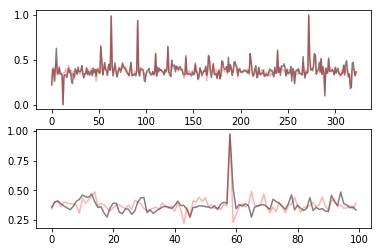

In [154]:
with tf.Session() as sess:
#     tf.reset_default_graph()
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss, pred = sess.run([train, loss, Y_pred], feed_dict={
                                X: x_train, Y: y_train})
        if(iterations%100==0):
            print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: x_test})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: y_test, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))
    
    plt.subplot(2,1,1)
    plt.plot(y_train, 'grey')
    plt.plot(pred, 'r', alpha=0.3)
    plt.subplot(2,1,2)
    plt.plot(y_test, 'grey')
    plt.plot(test_predict, 'r', alpha=0.3)

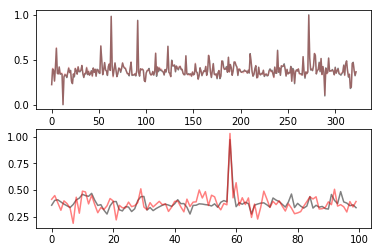

In [33]:
    plt.subplot(2,1,1)
    plt.plot(y_train, 'grey')
    plt.plot(pred, 'r', alpha=0.2)
    plt.subplot(2,1,2)
    plt.plot(y_test, 'grey')
    plt.plot(test_predict, 'r', alpha=0.5)

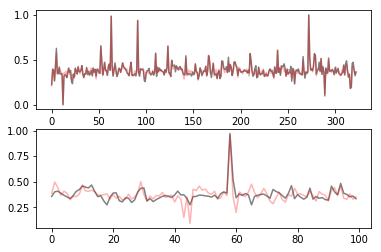

In [16]:
    plt.subplot(2,1,1)
    plt.plot(y_train, 'grey')
    plt.plot(pred, 'r', alpha=0.3)
    plt.subplot(2,1,2)
    plt.plot(y_test, 'grey')
    plt.plot(test_predict, 'r', alpha=0.3)

In [15]:
tmp_train = pd.DataFrame({'train_pred': pred.tolist(), 'train_real': y_train.tolist()})
tmp_train

,train_pred[09-15][16],train_real
0,[0.4011603593826294],[0.22421981715512698]
1,[0.3650863766670227],[0.39720875876241285]
2,[0.3882737457752228],[0.3837656107517814]
3,[0.3407669961452484],[0.26379813853931183]
4,[0.38862594962120056],[0.4190556405158106]
5,[0.4049314558506012],[0.6271277330796643]
6,[0.37077489495277405],[0.34879066409635506]
7,[0.3773297965526581],[0.34369829552007697]
8,[0.3664299547672272],[0.4196106040936719]
9,[0.3672642707824707],[0.33882514472725017]


In [16]:
tmp_test = pd.DataFrame({'test_pred': test_predict.tolist(), 'test_real': y_test.tolist()})
tmp_test

,test_pred[09-15][16],test_real
0,[0.33481088280677795],[0.35679191425047035]
1,[0.3773342967033386],[0.4020300291402025]
2,[0.383046418428421],[0.4075483243778911]
3,[0.40388450026512146],[0.38755833668088085]
4,[0.3855047821998596],[0.367378224047388]
5,[0.37342432141304016],[0.3513714626314585]
6,[0.3357808291912079],[0.33548986443736967]
7,[0.3676690459251404],[0.363471615903136]
8,[0.3754534125328064],[0.40658016292721577]
9,[0.3694070279598236],[0.4233238673664181]


In [17]:
tmp_train.to_csv("compare_train_without_company[09-15][16].csv", header=True, index=False)
tmp_test.to_csv("compare_test_without_company[09-15][16].csv", header=True, index=False)